In [48]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor #modelo random forest y #gradient boosted trees
from sklearn.svm import SVR #support vector regression
from sklearn.linear_model import Ridge,Lasso # regression with regularization: Rigde: is given by the l2-norm. Also known as Ridge Regression
from sklearn.kernel_ridge import KernelRidge #kernel ridge regression
from sklearn import preprocessing # para feature scaling
from sklearn.metrics import mean_squared_error, r2_score #métricas

In [49]:
%matplotlib inline

In [50]:
#import Data por industria
file= 'Dataframe_Importaciones_mensuales_version2.csv'
datos=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
datos.iloc[:,:]

,Pais_vendedor,industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,2000,Enero,30303804.0
1,América Latina,Industrias Manufactureras,2000,Febrero,21215828.0
2,América Latina,Industrias Manufactureras,2000,Marzo,31298113.0
3,América Latina,Industrias Manufactureras,2000,Abril,33358374.0
4,América Latina,Industrias Manufactureras,2000,Mayo,67373766.0
5,América Latina,Industrias Manufactureras,2000,Junio,58354363.0
6,América Latina,Industrias Manufactureras,2000,Julio,47566573.0
7,América Latina,Industrias Manufactureras,2000,Agosto,51311091.0
8,América Latina,Industrias Manufactureras,2000,Septiembre,36400806.0
9,América Latina,Industrias Manufactureras,2000,Octubre,50265853.0


In [51]:
#import Data variables de entrada 
file= 'DFImportsvarentrada.csv'
variables_entrada=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')

In [52]:
#import vector de valores reales mensuales(420):
file= 'realesimp.csv'
reales=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')

In [53]:
#import DF proporciones 1
file= 'proporciones1imp.csv'
df_propor_1=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
df_propor_1.iloc[:,:]

,proporciones_mensuales
0,0.078907
1,0.077194
2,0.084575
3,0.083989
4,0.087830
5,0.086516
6,0.088436
7,0.084299
8,0.079507
9,0.085172


In [54]:
#import DF proporciones 2
file= 'proporciones2imp.csv'
df_propor_2=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
df_propor_2.iloc[:,:]

,proporciones_mensuales
0,0.076886
1,0.073851
2,0.081882
3,0.079940
4,0.084100
5,0.082482
6,0.084206
7,0.088148
8,0.083033
9,0.090428


In [55]:
#cambiar meses de STR a números y hacer el "Año" float:
datos.Mes=datos.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
datos['Año']=datos['Año'].values.astype(np.float)

In [56]:
#reemplazar numeros de años para modificar que los años comienzen en agosto y terminen en julio, así se harán predicciones
#para el último año "17" siendo este agosto2016-julio2017

rows_toreplace=datos[(datos.Año==2000) & (datos.Mes<8)].index.values # filas a reemplazar año 0(enero2000-julio2000)
datos.loc[rows_toreplace,'Año']=0

for año0,año1,i in zip(range(2000,2017),range(2001,2018),range(1,18)):
    rows_toreplace=datos[(datos.Año==año0) & (datos.Mes>7)].index.values # filas a reemplazar del año (agosto-diciembre)
    datos.loc[rows_toreplace,'Año']=i 
    rows_toreplace=datos[(datos.Año==año1) & (datos.Mes<8)].index.values # filas a reemplazar del año (enero-julio)
    datos.loc[rows_toreplace,'Año']=i

In [57]:
datos

,Pais_vendedor,industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,0.0,1,30303804.0
1,América Latina,Industrias Manufactureras,0.0,2,21215828.0
2,América Latina,Industrias Manufactureras,0.0,3,31298113.0
3,América Latina,Industrias Manufactureras,0.0,4,33358374.0
4,América Latina,Industrias Manufactureras,0.0,5,67373766.0
5,América Latina,Industrias Manufactureras,0.0,6,58354363.0
6,América Latina,Industrias Manufactureras,0.0,7,47566573.0
7,América Latina,Industrias Manufactureras,1.0,8,51311091.0
8,América Latina,Industrias Manufactureras,1.0,9,36400806.0
9,América Latina,Industrias Manufactureras,1.0,10,50265853.0


In [58]:
#agrupar datos para tener datos anuales 0:
datos_anuales_0=datos.groupby(['Pais_vendedor','industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_0=datos_anuales_0.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_0.head(30)

,Pais_vendedor,industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,6.079525e+08
1,América Latina,Industrias Manufactureras,2.0,9.898354e+08
2,América Latina,Industrias Manufactureras,3.0,7.444271e+08
3,América Latina,Industrias Manufactureras,4.0,8.148923e+08
4,América Latina,Industrias Manufactureras,5.0,8.692589e+08
5,América Latina,Industrias Manufactureras,6.0,1.165175e+09
6,América Latina,Industrias Manufactureras,7.0,1.649701e+09
7,América Latina,Industrias Manufactureras,8.0,2.044681e+09
8,América Latina,Industrias Manufactureras,9.0,1.979528e+09
9,América Latina,Industrias Manufactureras,10.0,2.699392e+09


In [21]:
#agrupar datos para tener datos anuales 1:
datos_anuales_1=datos.groupby(['Pais_vendedor','industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_1=datos_anuales_1.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_1.head(30)

,Pais_vendedor,industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,6.079525e+08
1,América Latina,Industrias Manufactureras,2.0,9.898354e+08
2,América Latina,Industrias Manufactureras,3.0,7.444271e+08
3,América Latina,Industrias Manufactureras,4.0,8.148923e+08
4,América Latina,Industrias Manufactureras,5.0,8.692589e+08
5,América Latina,Industrias Manufactureras,6.0,1.165175e+09
6,América Latina,Industrias Manufactureras,7.0,1.649701e+09
7,América Latina,Industrias Manufactureras,8.0,2.044681e+09
8,América Latina,Industrias Manufactureras,9.0,1.979528e+09
9,América Latina,Industrias Manufactureras,10.0,2.699392e+09


In [16]:
#funcion para modificiar variables categóricas

def categoricas(Data,tipo):
    if tipo==1: # variables pais comprador e industria se convierten a variables tipo dummie
        
        no_dummie=Data.iloc[:,2:]
        temp=pd.get_dummies(Data['Pais_vendedor'])
        temp1=pd.get_dummies(Data['industria'])
        datafinal=temp.join(temp1).join(no_dummie)
        datafinal=datafinal.reset_index(drop=True)
        
    if tipo==2: # variables pais vendedor e industria se reemplazan por números 1,2,3....n asignados jerarquicamente por volumen de importacion.
        
        Data.Pais_vendedor=Data.Pais_vendedor.map({'América Latina':4,'Asia':2,'Europa':3,'Africa':5,'Oceanía':6,'América del Norte':1
                               ,'otro':7})
        Data.industria=Data.industria.map({'Industrias Manufactureras':1,'Agricultura y Silvicultura':2,'Servicios y Productos no Clasificados':3
                                           ,'Industrias Extractivas':4,'Ganadería, Apicultura, Caza, Pesca':5})
        datafinal=Data
        
    if tipo==3: # variables pais vendedor e industria se reemplazan por el promedio mensual de las importaciones del segmento(solo conjunto train).

        data_train=datos.query('Año<2015').reset_index(drop=True) #desde diciembre 2000 hasta 2014 
        datosporindus=data_train.groupby('industria',as_index=True)['Monto'].mean()
        datosporpais=data_train.groupby('Pais_vendedor',as_index=True)['Monto'].mean()
        
        Data.Pais_vendedor=Data.Pais_vendedor.map({'América Latina':datosporpais['América Latina'],'Asia':datosporpais['Asia']
                                                     ,'Europa':datosporpais['Europa'],'Africa':datosporpais['Africa']
                                                     ,'Oceanía':datosporpais['Oceanía'],'América del Norte':datosporpais['América del Norte']
                                                     ,'otro':datosporpais['otro']})
        Data.industria=Data.industria.map({'Industrias Manufactureras':datosporindus['Industrias Manufactureras']
                                           ,'Agricultura y Silvicultura':datosporindus['Agricultura y Silvicultura']
                                           ,'Servicios y Productos no Clasificados':datosporindus['Servicios y Productos no Clasificados']
                                           ,'Industrias Extractivas':datosporindus['Industrias Extractivas']
                                           ,'Ganadería, Apicultura, Caza, Pesca':datosporindus['Ganadería, Apicultura, Caza, Pesca']})
        datafinal=Data
        
    return(datafinal)

In [24]:
#mandar llamar funcion para modificar var categóricas y crear 3 datas frames(uno para cada tipo de conversión):
#data_mof_tipo1, data_mof_tipo2, data_mof_tipo3
tipo=2
data_mof_tipo2=categoricas(datos_anuales_0,tipo)
data_mof_tipo2

,Pais_vendedor,industria,Año,Monto
0,4,1,1.0,6.079525e+08
1,4,1,2.0,9.898354e+08
2,4,1,3.0,7.444271e+08
3,4,1,4.0,8.148923e+08
4,4,1,5.0,8.692589e+08
5,4,1,6.0,1.165175e+09
6,4,1,7.0,1.649701e+09
7,4,1,8.0,2.044681e+09
8,4,1,9.0,1.979528e+09
9,4,1,10.0,2.699392e+09


In [25]:
#funcion para facilitar el modelado de random forest
def modelfit(algorithm,datos,tipo,printFeatureImportance=True): 
        
    #dividir train,cross y tst
    data_train=datos.query('Año<17').reset_index(drop=True) #desde año 1 hasta 16
    data_test=datos.query('Año == 17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
                  
    #Fit the algorithm on the training data
    algorithm.fit(X_train,Y_train)
            
    #Predict test set:   
    dtest_predictions = algorithm.predict(X_test)
    dtest_predictions[dtest_predictions<0]=0
       
    #errores personalizados para test set:
    pd_dtest_predictions=pd.DataFrame(dtest_predictions,columns=['Prediccion'])
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dtest_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(dtest_predictions)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Test mean_squared_error : %.4g" % mean_squared_error(Y_test.values, dtest_predictions))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test)
           
    #Print Feature Importance:
    if printFeatureImportance:
        predictors=list(X_train.columns.values)
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return pd_dtest_predictions,Y_test

C:\Users\Edu\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Report
Test mean_squared_error : 2.06e+17
Test error de la suma total de todas las predicciones : 0.09207
Test error del monto de cada prediccion(35) : 0.09598


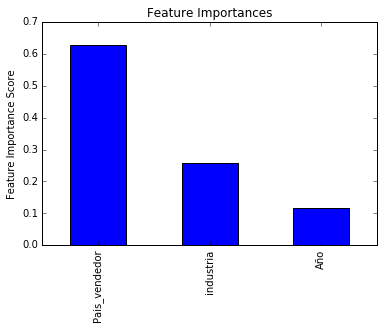

In [40]:
#crear modelo y mandar llamar funcion para modelado(random forest)
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #para random forest funciono mejor el tipo 3
            
gbm0 = RandomForestRegressor(random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo3,tipo)

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Test mean_squared_error : 5.262e+17
Test error de la suma total de todas las predicciones : 0.08441
Test error del monto de cada prediccion(35) : 0.156


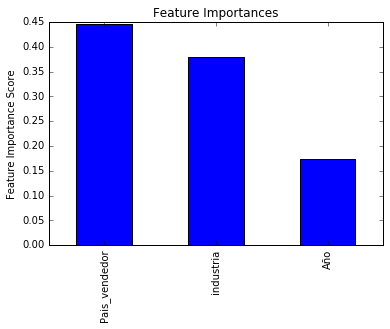

In [27]:
#crear modelo y mandar llamar funcion para modelado Gradient boosted trees:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #para boosted trees funcionó mejor el tipo 3
            
gbm0 = GradientBoostingRegressor(loss='ls',random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo3,tipo)

In [28]:
#funcion para modelar Regresion Kernel Ridge:
def kernel_ridge(datos,tipo,Alpha,pol_degree,g): 
    
    #dividir train,cross y tst:
    data_train=datos.query('Año<17').reset_index(drop=True) #desde año 1 hasta 16
    data_test=datos.query('Año==17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
    
    #soft normalization:
    
    columns_names=list(X_train.columns) #obtener nombres de columnas(variables) para no perderlos
    scaler = preprocessing.StandardScaler().fit(X_train) #sacar medias y varianzas del training set para futura normalización
    
    X_train=scaler.transform(X_train) #normalizar training set
    X_train=pd.DataFrame(X_train,columns=columns_names) #convertir de array a DataFrame
        
    X_test=scaler.transform(X_test) #normalizar test set
    X_test=pd.DataFrame(X_test,columns=columns_names) #convertir de array a DataFram
    
    #entrenar modelos con training data set
    
    Kridge_linear = KernelRidge(kernel='linear',alpha=Alpha).fit(X_train,Y_train)#Small positive values of alpha improve the conditioning 
    #of the problem and reduce the variance of the estimates
    Kridge_poly = KernelRidge(kernel='poly',degree=pol_degree,alpha=Alpha,gamma=g).fit(X_train,Y_train) 
    Kridge_rbf = KernelRidge(kernel='rbf',alpha=Alpha,gamma=g).fit(X_train,Y_train) #gamma es el coeficiente del kernel/gamma es el ancho del guassiano                                                  
    Kridge_laplacian= KernelRidge(kernel='laplacian',alpha=Alpha,gamma=g).fit(X_train,Y_train) # "C" is the penalization for error term
    
 
    # hacer predicciones de test data set::
    
    ########### predicciones con kernel lineal: #################
    
    #Predict test set:  
 
    resultados_lineal=Kridge_linear.predict(X_test)
    resultados_lineal[resultados_lineal<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lineal)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lineal)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Linear Kernel")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test mean_squared_error Linear Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lineal))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test0)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test0)
    
    ########### predicciones con kernel polinomial:#################
    
    #Predict test set:  
 
    resultados_poly=Kridge_poly.predict(X_test)
    resultados_poly[resultados_poly<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_poly)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_poly)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Polynomial Kernel")
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t Alpha: %1.3f' %Alpha)
    print('\t Gamma: %1.3f' %g)
    print ("Test mean_squared_error Polynomial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_poly))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test1)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test1)
     
    
    ########### predicciones con kernel Radial:#################
    
    #Predict test set: 
 
    resultados_rbf=Kridge_rbf.predict(X_test)
    resultados_rbf[resultados_rbf<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_rbf)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Radial Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_rbf))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test2)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test2)
     
    ########### predicciones con kernel Laplacian:#################
    
    #Predict test set: 
 
    resultados_lapla=Kridge_laplacian.predict(X_test)
    resultados_lapla[resultados_lapla<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lapla)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lapla)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test3=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test3=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Laplacian Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Laplacian Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lapla))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test3)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test3)
            
    ###hacer data frame con los resultados de los 4 tipos de kernels:
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_rbf),4)),columns=['Linear','Polynomial','Radial','Laplacian'])
        
    resultados_fun.loc[:,'Linear']=resultados_lineal
    resultados_fun.loc[:,'Polynomial']=resultados_poly
    resultados_fun.loc[:,'Radial']=resultados_rbf
    resultados_fun.loc[:,'Laplacian']=resultados_lapla
    
    return   Y_test,resultados_fun

In [59]:
#mandar llamar funcion para modelado con regresión Kernel Ridge:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #el mejor fue el tipo 3

Alpha=4
pol_degree=4
g=.2
resu_cross,resultados_fun=kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)


Model Report Linear Kernel
	 alpha: 4.000
Test mean_squared_error Linear Kernel: 1.538e+19
Test error de la suma total de todas las predicciones : 0.2493
Test error del monto de cada prediccion(35) : 1.011

Model Report Polynomial Kernel
	 Grado polinomio 4.000
	 Alpha: 4.000
	 Gamma: 0.200
Test mean_squared_error Polynomial Kernel: 4.684e+17
Test error de la suma total de todas las predicciones : 0.04487
Test error del monto de cada prediccion(35) : 0.1544

Model Report Radial Kernel
	 Alpha: 4.000
	 gamma: 0.200
Test mean_squared_error Radial Kernel: 6.308e+18
Test error de la suma total de todas las predicciones : 0.2802
Test error del monto de cada prediccion(35) : 0.5685

Model Report Laplacian Kernel
	 Alpha: 4.000
	 gamma: 0.200
Test mean_squared_error Laplacian Kernel: 8.426e+18
Test error de la suma total de todas las predicciones : 0.2001
Test error del monto de cada prediccion(35) : 0.749


In [30]:
#funcion para convertir las predicciones anuales a mensuales (de 35 a 420):
def anuales_a_mensuales(resultados,col,proporciones):
    
    df_propor_T=proporciones.T
    df_propor_T=df_propor_T.as_matrix()
    
    pd_resu=pd.DataFrame(resultados_fun.iloc[:,col])
    pd_resu=pd_resu.as_matrix()
    
    matrix_mult=pd.DataFrame(np.matmul(pd_resu,df_propor_T))
    matrix_mult_T=matrix_mult.T
    
    predicciones_mensuales=pd.DataFrame(pd.Series(matrix_mult_T.values.ravel('F')),columns=['Predicciones'])
    return predicciones_mensuales

In [60]:
#mandar llamar funcion para convertir predicciones anuales a mensuales:
col=1
predicciones_mensuales=anuales_a_mensuales(resultados_fun,col,df_propor_2)  #funcioo mejor proporciones 2

In [33]:
#funcion para crear data frame de datos reales y predicciones agrupadas por año y mes(montos mensuales totales)
def DF_realesvspredicciones(variables_entrada,reales,predicciones):
    kr=predicciones.Predicciones.values
    kr=kr.reshape(-1,)
    ky=reales.values
    ky=ky.reshape(-1,)
    km=variables_entrada.Mes
    km=km.reshape(-1,)
    kyear=variables_entrada.Año
    kyear=kyear.reshape(-1,)
    
    d={'Año':kyear,'Mes':km,'Reales':ky,'Predicciones':kr}
    daataa=pd.DataFrame(d)
    dataagrupada=daataa.groupby(['Año','Mes'],as_index=False,sort=False).sum()
    return dataagrupada

In [61]:
#mandar llamar funcion para dataframe reales vs predicciones (montos mensuales totales):
reales_predicciones=DF_realesvspredicciones(variables_entrada,reales,predicciones_mensuales)
reales_predicciones

,Año,Mes,Predicciones,Reales
0,2016.0,8,3.940417e+09,4.552822e+09
1,2016.0,9,3.784860e+09,4.361642e+09
2,2016.0,10,4.196480e+09,4.409187e+09
3,2016.0,11,4.096950e+09,4.437251e+09
4,2016.0,12,4.310134e+09,3.960032e+09
5,2017.0,1,4.227221e+09,4.120849e+09
6,2017.0,2,4.315549e+09,4.054624e+09
7,2017.0,3,4.517607e+09,4.686511e+09
8,2017.0,4,4.255422e+09,4.306549e+09
9,2017.0,5,4.634440e+09,4.746069e+09


In [62]:
#funcion para errores mensuales:

def errores_mensuales(data):
    
    # errores mensuales:
    
    diferencias_abs=pd.DataFrame(abs(data.Reales.values-data.Predicciones.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(data.Predicciones)
    sum_reales=sum(data.Reales)
    diferencia_total=sum_reales-sum_predicciones
    
    errores_mensuales=pd.DataFrame(diferencias_abs.Diferencias.values/reales_predicciones.Reales.values,columns=['error_anual_mensual'])
    #errores_mensuales=errores_mensuales.join(data.Mes)
    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 

    print("Error de la suma total de predicciones mensuales: %.4g" % porcentaje_error)
    print("Error de cada prediccion mensual: %.4g" % porcentaje_error_abs)
    
    return errores_mensuales

In [63]:
#mandar llamar funcion de errores mensuales: #proporciones 2
df_errores_mensuales=errores_mensuales(reales_predicciones)
df_errores_mensuales

Error de la suma total de predicciones mensuales: 0.04487
Error de cada prediccion mensual: 0.07161


,error_anual_mensual
0,0.134511
1,0.132240
2,0.048242
3,0.076692
4,0.088409
5,0.025813
6,0.064352
7,0.036040
8,0.011872
9,0.023520


In [65]:
#import DF errore mensuales desde datos mensuales para comparativo:
file= 'df_errores_mensuales_imp.csv'
errores_mensuales_mensuales=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
errores_mensuales_mensuales.iloc[:,:]

,error_mensual,Mes
0,0.001895,8
1,0.063303,9
2,0.040350,10
3,0.040453,11
4,0.118901,12
5,0.098382,1
6,0.088539,2
7,0.041063,3
8,0.036560,4
9,0.024762,5


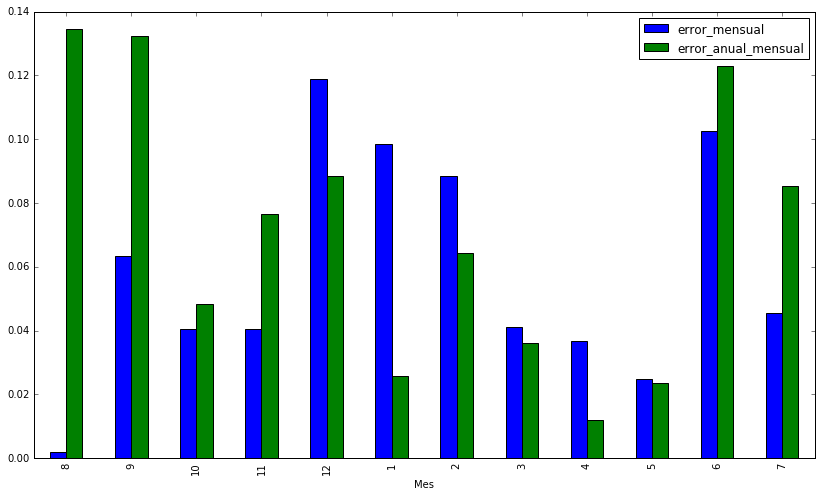

In [66]:
#unir los dos Df de errores mensuales y hacer plot
comparar_errores_mensuales=errores_mensuales_mensuales.join(df_errores_mensuales)
comparar_errores_mensuales=comparar_errores_mensuales.set_index('Mes')
comparar_errores_mensuales.plot(kind='bar',figsize=(14,8))